# HR_analytics

In [125]:
import os
import pandas as pd
import numpy as np

adding path

In [126]:
os.chdir("D:/D_S/HR_Analytics_project")

In [127]:
fullraw=pd.read_csv("train.csv")

In [128]:
fullraw.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [129]:
predDf=pd.read_csv('test.csv')

### adding is_promoted column in predDf

In [130]:
predDf['is_promoted']=0

In [131]:
predDf.shape

(23490, 14)

In [132]:
predDf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### splitting data in fullraw traindf and testdf

In [133]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(fullraw,train_size=0.7,random_state=97)

In [134]:
# create source column in train test and predDf
trainDf['Source']='Train'
testDf['Source']='Test'
predDf['Source']= 'prediction'



In [135]:
#combine train , test and prediction in fullraw
fullraw=pd.concat([trainDf,testDf,predDf],axis=0)
fullraw.shape
fullraw.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Source'],
      dtype='object')

In [136]:
# check for NA values in fullraw table
fullraw.isna().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
Source                     0
dtype: int64

In [137]:
# Filling NA values using mode and median
'''tempMode = fullraw.loc[fullraw['Source']=='Train','education'].mode()[0]
tempMode
fullraw['education'].fillna(tempMode,inplace=True)
'''
for col in fullraw.columns:
    if((fullraw[col].isna().sum())>0):
        print("Null Values Found in Column :*",col)
    if((fullraw[col].dtypes=='float64') or (fullraw[col].dtypes == 'int64')):
        tempMedian=fullraw.loc[fullraw['Source']=='Train',col].median()
        tempMedian
        fullraw[col].fillna(tempMedian,inplace=True)
    elif(fullraw[col].dtypes == "O"):
        tempMode=fullraw.loc[fullraw['Source']== 'Train',col].mode()[0]
        tempMode
        fullraw[col].fillna(tempMode,inplace=True)
    else:
        print("No Null Values Found in :",col)


Null Values Found in Column :* education
Null Values Found in Column :* previous_year_rating


In [138]:
fullraw.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Source                  0
dtype: int64

In [139]:
fullraw

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Source
45986,52109,Technology,region_31,Bachelor's,f,other,1,27,2.0,2,0,0,79,0,Train
5418,5043,Procurement,region_7,Master's & above,f,sourcing,1,59,3.0,18,0,0,70,0,Train
26182,58288,Analytics,region_22,Master's & above,m,other,1,45,3.0,7,0,0,89,0,Train
40963,74198,Sales & Marketing,region_25,Bachelor's,m,other,1,31,4.0,6,0,0,58,1,Train
5436,63431,Analytics,region_22,Bachelor's,m,referred,1,28,3.0,1,0,0,87,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0,prediction
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0,prediction
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0,prediction
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,0,prediction


In [140]:
#summary of fullraw
fullraw_summary=fullraw.describe()
fullraw_summary

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,39149.500000,1.253378,34.797619,3.307032,5.848974,0.354032,0.023053,63.349664,0.059618
std,22602.830026,0.606766,7.665928,1.215425,4.248070,0.478222,0.150073,13.383664,0.236780
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [141]:
#removing employee id from table
fullraw.drop(['employee_id'],axis=1,inplace=True)


In [142]:
fullraw.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Source'],
      dtype='object')

#### Manual recording of "Dependent Variables"

In [143]:
# class ratio
fullraw.loc[fullraw['Source']=='Train','is_promoted'].value_counts()/fullraw[fullraw['Source']=='Train'].shape[0]

0    0.914662
1    0.085338
Name: is_promoted, dtype: float64

##### 91.47% are not promoted and 8.53 are promoted


#### outlier detection and correction

In [144]:
fullraw.columns 
columnsForOutlierDetection=['age','length_of_service','avg_training_score']


summary_before_outlier_correction= fullraw.describe()
for column in columnsForOutlierDetection:

    print(column)
    
    Q1 = np.percentile(fullraw.loc[fullraw['Source']=='Train',column],25)
    Q3=np.percentile(fullraw.loc[fullraw['Source']=='Train',column],75)
    IQR=Q3-Q1
    UB = Q3+ 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    
    #upper bound operation
    fullraw[column]=np.where(fullraw[column]>UB,UB,fullraw[column])
    
    #Lower bound operation
    fullraw[column]=np.where(fullraw[column]>LB,LB,fullraw[column])
    
summary_after_outlier_correction =fullraw.describe()


age
length_of_service
avg_training_score


### Dummy Variable creation


In [145]:
fullraw2= pd.get_dummies(fullraw,drop_first = False)

In [146]:
fullraw2.shape

(78298, 62)

### Divide the Data into Train and Test

In [147]:
#divide the data into train and test based on source column and make sure you drop the source coumn

#step1: divide into train and test set
Train = fullraw2[fullraw2['Source_Train'] ==1].drop(['Source_Train','Source_Test'],axis=1).copy()
Test = fullraw2[fullraw2['Source_Test']==1].drop(['Source_Train','Source_Test'],axis=1).copy()
Pred = fullraw2[(fullraw2['Source_Train']==0) & (fullraw2['Source_Test']==0)].drop(['Source_Train','Source_Test'],axis=1)

### Sampling into X and Y

In [148]:
#Divide each dataset into independent and dependent variable
depVar = 'is_promoted'
trainX=Train.drop(depVar,axis=1).copy()
trainY=Train[depVar].copy()
testX=Test.drop(depVar,axis=1).copy()
testY= Test[depVar].copy()
predX=Pred.drop(depVar,axis=1).copy()

In [149]:
trainX.shape
trainY.shape

(38365,)

In [150]:
testX.shape

(16443, 59)

In [151]:
predX.shape

(23490, 59)

### DECISION TREE MODEL

In [152]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from matplotlib.pyplot import figure, savefig, close

In [153]:
M1=DecisionTreeClassifier(random_state = 97).fit(trainX,trainY) 
#indep , dep

### Model Visulization

In [154]:
#Visualization of DT
figure(figsize = [20,10])

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

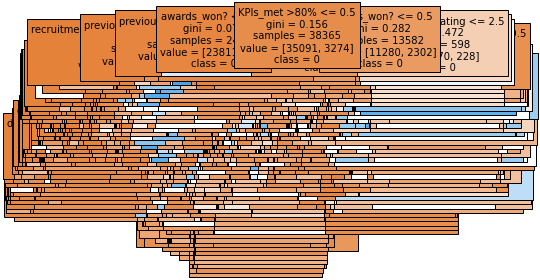

In [155]:
DT_Plot1= plot_tree(M1,fontsize =10,feature_names = trainX.columns,
                   filled = True,class_names=["0","1"])
# filled= True allows the method to use colors to use toindicate the majority of the class
#class_names =["0","1"] allows the method to provide the dependent variable "MAJORITY"
#class name for each of colored boxes

### Prediction and Validation on Test set

In [156]:
from sklearn.metrics import classification_report
# prediction on test set
Test_Pred = M1.predict(testX)

In [157]:
#classification Model Validation
confusion_Mat = pd.crosstab(testY,Test_Pred) #r,c
confusion_Mat

col_0,0,1
is_promoted,,
0,14632,417
1,1218,176


In [158]:
# validation on test set
print(classification_report(testY,Test_Pred)) # acutal,pred

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     15049
           1       0.30      0.13      0.18      1394

    accuracy                           0.90     16443
   macro avg       0.61      0.55      0.56     16443
weighted avg       0.87      0.90      0.88     16443



### DT model 2


In [159]:
# Build Model
M2= DecisionTreeClassifier(random_state=97,min_samples_leaf = 500).fit(trainX,trainY)

In [160]:
# Visualization of DT
figure(figsize = [20,10])
DT_Plot2 = plot_tree(M2,fontsize =10,feature_names = trainX.columns,
                     filled = True,class_names=['0','1'])
# to save the current plot on file through code 
savefig('D:\\D_S\\HR_Analytics_project')
close()

In [161]:
#predicition on testset
Test_Pred = M2.predict(testX)

In [162]:
#classification on testset
confusion_Mat = pd.crosstab(testY,Test_Pred)
confusion_Mat # R,C format


col_0,0
is_promoted,
0,15049
1,1394


In [163]:
#Validation on Testset
print(classification_report(testY,Test_Pred)) # actual, predicted

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15049
           1       0.00      0.00      0.00      1394

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.87     16443



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
M1_RF=RandomForestClassifier(random_state= 97).fit(trainX,trainY)


In [165]:
#prediction on testset
Test_Pred = M1_RF.predict(testX)

In [166]:
#confusion matrix
confusion_Mat = pd.crosstab(testY,Test_Pred) # R,C format
confusion_Mat

col_0,0,1
is_promoted,,
0,14723,326
1,1247,147


In [167]:
#validation on testset
print(classification_report(testY,Test_Pred)) # actual,predicted


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15049
           1       0.31      0.11      0.16      1394

    accuracy                           0.90     16443
   macro avg       0.62      0.54      0.55     16443
weighted avg       0.87      0.90      0.88     16443



In [168]:
#variable importance
M1_RF.feature_importances_

array([8.87422013e-02, 0.00000000e+00, 1.89274729e-01, 0.00000000e+00,
       1.08676558e-01, 8.03165192e-02, 0.00000000e+00, 1.44210177e-02,
       1.24643360e-02, 8.71922642e-03, 5.60007167e-03, 1.91435091e-02,
       1.81512788e-02, 6.28247642e-03, 1.68437219e-02, 1.70813306e-02,
       5.22454939e-03, 5.28658631e-03, 7.53610632e-03, 4.26690564e-03,
       1.28890087e-02, 6.26346523e-03, 1.33579823e-02, 8.41865157e-03,
       8.38357809e-03, 2.84826612e-06, 5.24654381e-03, 2.04117615e-02,
       6.13029243e-03, 3.30933737e-03, 1.47341995e-02, 1.02615123e-02,
       3.35668279e-03, 7.21132613e-03, 1.08665910e-02, 1.08635057e-02,
       8.91049635e-03, 5.39167136e-03, 5.20701826e-03, 6.66253287e-03,
       9.83002426e-03, 3.44007057e-03, 2.58332516e-03, 1.68796660e-03,
       9.85021148e-03, 5.11628645e-03, 4.19664372e-03, 1.58670643e-02,
       6.48977426e-03, 2.10375052e-03, 1.77185970e-02, 4.45168262e-03,
       1.76966625e-02, 2.33775109e-02, 2.38441657e-02, 3.37290242e-02,
      

In [169]:
Var_Importance_Df = pd.concat([pd.DataFrame(M1_RF.feature_importances_),
                             pd.DataFrame(trainX.columns)],axis =1)

In [170]:
Var_Importance_Df

,0,0
0,0.088742,no_of_trainings
1,0.000000,age
2,0.189275,previous_year_rating
3,0.000000,length_of_service
4,0.108677,KPIs_met >80%
5,0.080317,awards_won?
6,0.000000,avg_training_score
7,0.014421,department_Analytics
8,0.012464,department_Finance
9,0.008719,department_HR


In [171]:
Var_Importance_Df.columns = ['Value',"Variable_Name"]

In [172]:
Var_Importance_Df.sort_values('Value',ascending = False,inplace = True)

In [173]:
Var_Importance_Df

,Value,Variable_Name
2,0.189275,previous_year_rating
4,0.108677,KPIs_met >80%
0,0.088742,no_of_trainings
5,0.080317,awards_won?
55,0.033729,recruitment_channel_other
57,0.033490,recruitment_channel_sourcing
54,0.023844,gender_m
53,0.023378,gender_f
27,0.020412,region_region_2
11,0.019144,department_Operations


In [180]:
Var_Importance_Df.to_csv('Var_ImportanceDf.csv',index=False)

In [181]:
# How to use feature importance
temp_median = Var_Importance_Df['Value'].median()
tempDf=Var_Importance_Df[Var_Importance_Df['Value']>temp_median]
tempDf.shape
impVars = list(tempDf['Variable_Name'])
M1_RF_ImpVar = RandomForestClassifier(random_state = 97).fit(trainX[impVars],trainY)

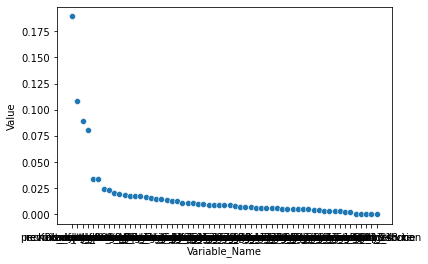

In [182]:
import seaborn as sns
plot = sns.scatterplot(x="Variable_Name",y = 'Value',data = Var_Importance_Df)

### RF Model with tuning parameters/ hyperparameter tuning


In [177]:
M2_RF = RandomForestClassifier(random_state = 97,n_estimators = 25,
                              max_features = 5, min_samples_leaf = 500)
M2_RF=M2_RF.fit(trainX,trainY)
Test_Pred = M2_RF.predict(testX)

In [178]:
#confusion matrix
confusion_Mat =pd.crosstab(testY,Test_Pred) #R,C 
confusion_Mat # actual, predicted

col_0,0
is_promoted,
0,15049
1,1394


In [179]:
#Validation on testset
print(classification_report(testY,Test_Pred)) # actual,predicted


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15049
           1       0.00      0.00      0.00      1394

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.87     16443



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest using GridSearchCV


In [183]:
n_estimators_List = [25, 50, 75] # range(25,100,25)
max_features_List = [5, 7, 9] # range(5,11,2)
min_samples_leaf_List = [5, 10, 25, 50]

from sklearn.model_selection import GridSearchCV
my_param_grid = {'n_estimators':n_estimators_List,
                'max_features': max_features_List,
                'min_samples_leaf':min_samples_leaf_List}
Grid_Search_Model = GridSearchCV(estimator = RandomForestClassifier(random_state=97),
                                param_grid = my_param_grid,
                                scoring = 'accuracy',
                                cv=3).fit(trainX,trainY) #param_grid is a dictionary


In [184]:
Model_Validation_Df4 = pd.DataFrame.from_dict(Grid_Search_Model.cv_results_)

In [185]:
Model_Validation_Df4
Model_Validation_Df4.to_csv('model4.csv',index=False)

In [195]:
#Based on the selected hyperparameters, you should build a final model on the complete training data (trainX,trainY)
RF_Final = RandomForestClassifier(random_state =97,n_estimators = 75,max_features= 5,
                                 min_samples_leaf =10).fit(trainX,trainY)
Test_Pred=RF_Final.predict(testX)

In [196]:
#confusion matrix
confusion_Mat= pd.crosstab(testY,Test_Pred) #R,C
confusion_Mat

col_0,0
is_promoted,
0,15049
1,1394


In [197]:
#validation on testset
print(classification_report(testY,Test_Pred)) # actual,pred

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15049
           1       0.00      0.00      0.00      1394

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.87     16443



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
#prediction on prediction dataset
predX['is_promoted']=RF_Final.predict(predX)
RF_output=pd.DataFrame()
RF_output=pd.concat([predDf['employee_id'],predX['is_promoted']],axis=1)
RF_output.to_csv('RF_ouput.csv',index=False)